# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren unabhängig voneinander

In [21]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for
from script.Verification import verification

In [22]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 5
batch_size = 1

number_of_adversarial_samples = 1000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [23]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [24]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float32)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


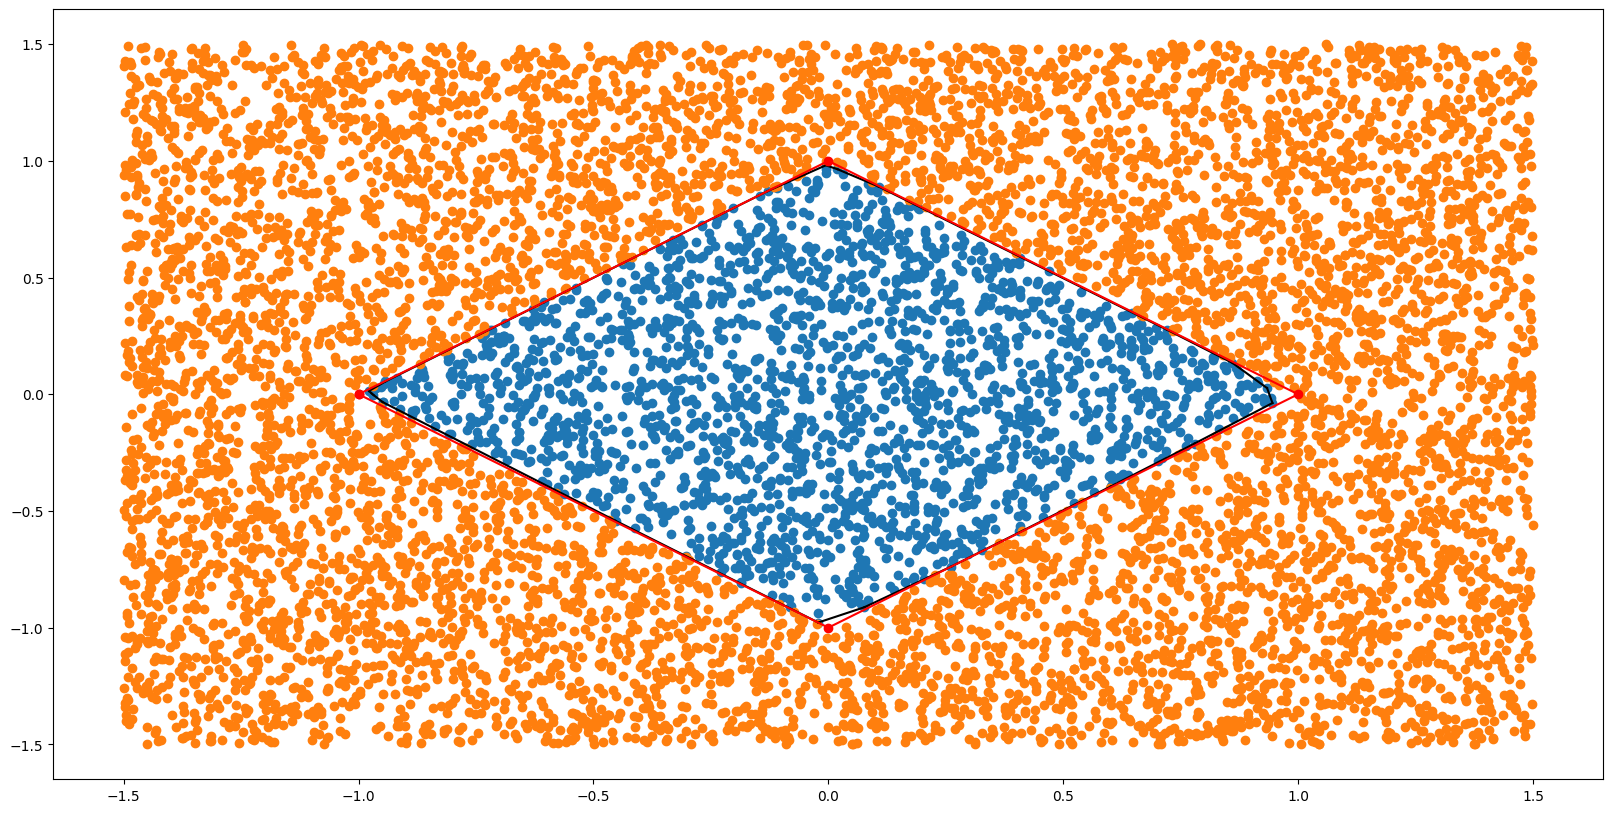

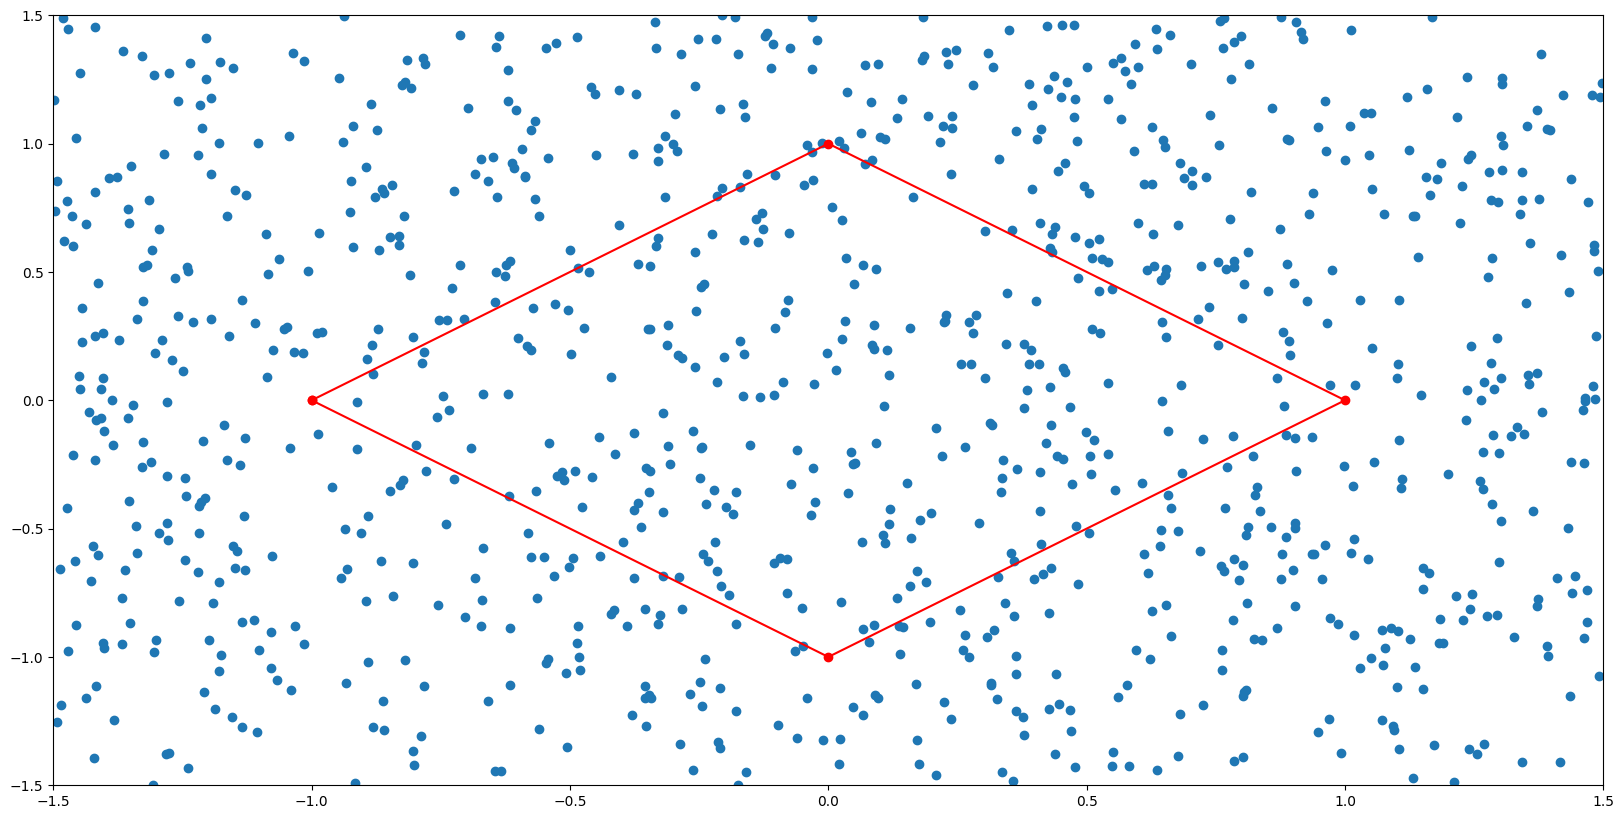

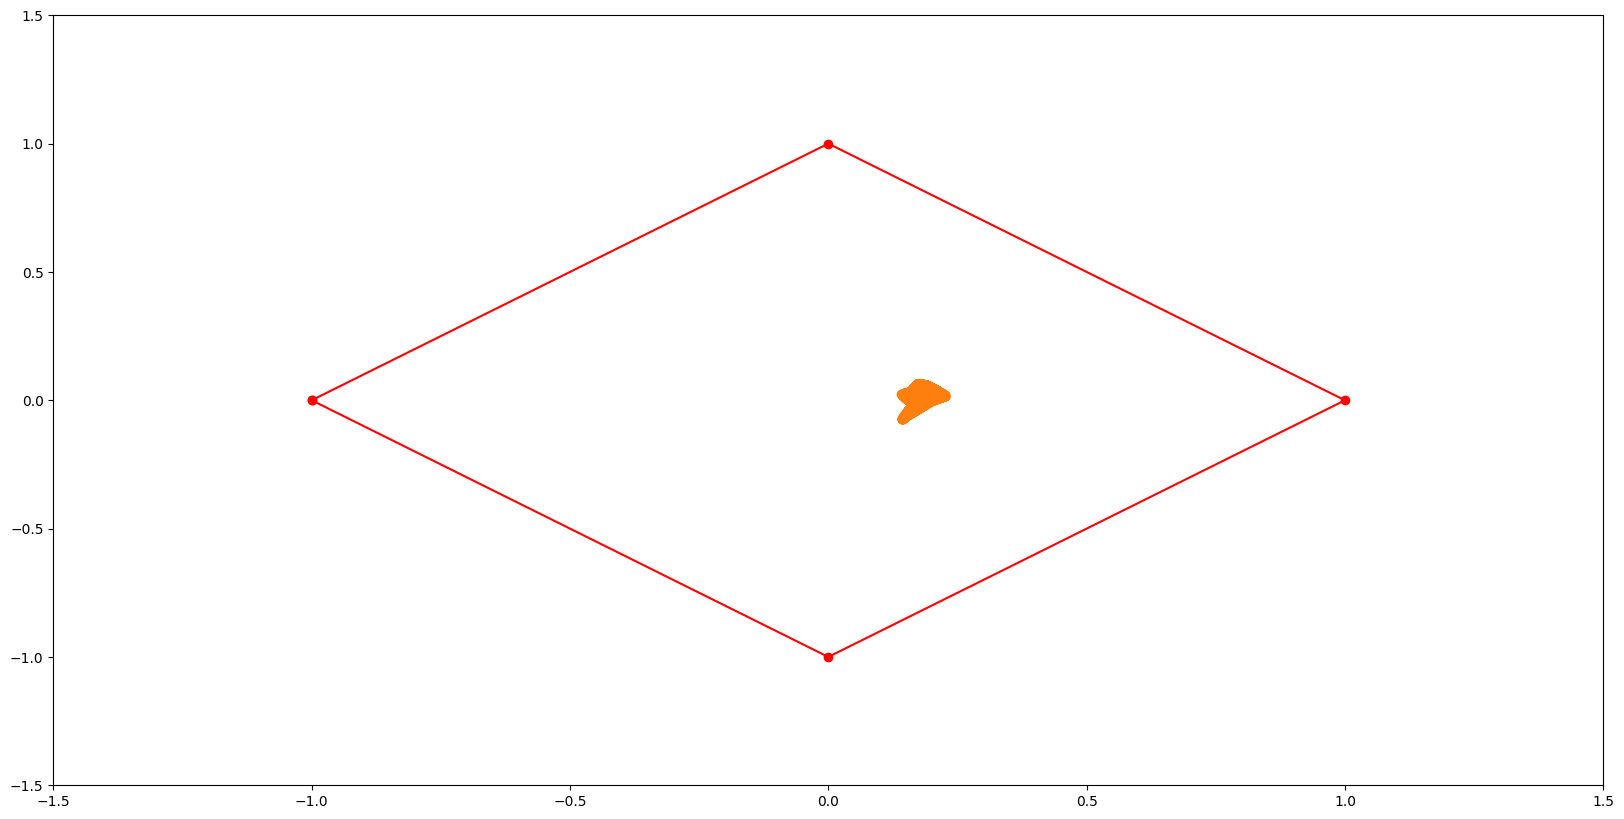

In [25]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


=== Epoch: 0===
batch = 0, mean loss = 1.4909281730651855
batch = 100, mean loss = 1.2990460690885488
batch = 200, mean loss = 1.294987997012352
batch = 300, mean loss = 1.2887440363434066
batch = 400, mean loss = 1.2725086881038257
batch = 500, mean loss = 1.2442484138730519
batch = 600, mean loss = 1.2217410027286575
batch = 700, mean loss = 1.1947268972893414
batch = 800, mean loss = 1.1722463852308513
batch = 900, mean loss = 1.1437528327884738
batch = 1000, mean loss = 1.1190354073202455
batch = 1100, mean loss = 1.0936440738031368
batch = 1200, mean loss = 1.071190431627207
batch = 1300, mean loss = 1.0467261152025555
batch = 1400, mean loss = 1.0214932962964893
batch = 1500, mean loss = 1.001166811412688
batch = 1600, mean loss = 0.9801399094808259
batch = 1700, mean loss = 0.9589191652584749
batch = 1800, mean loss = 0.9372544852331041
batch = 1900, mean loss = 0.9202694530740404
batch = 2000, mean loss = 0.9025001869030085
batch = 2100, mean loss = 0.8855612273516399
batch = 2

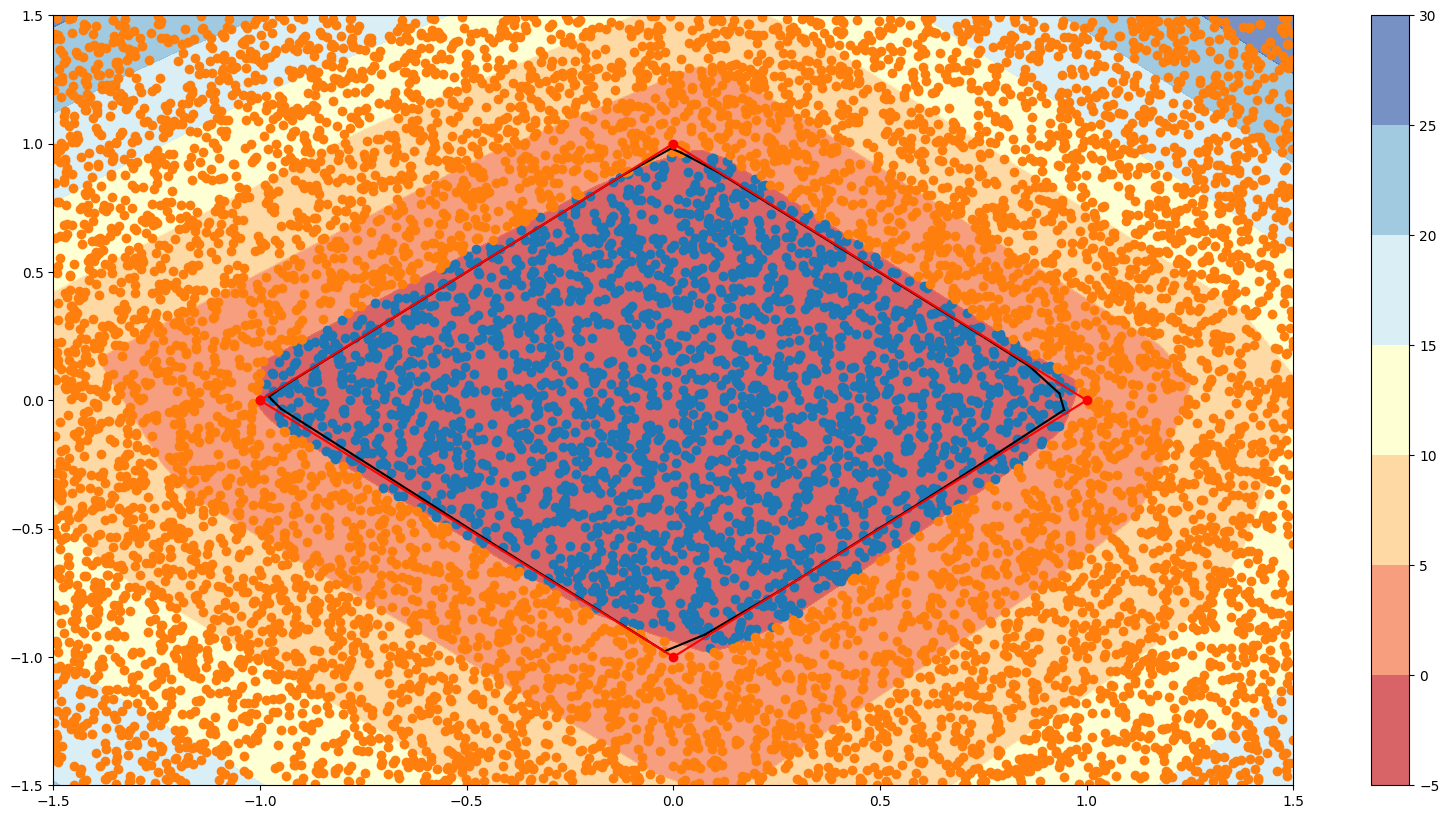

In [26]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
plots.plt_mesh()

In [27]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, train_ICNN=False, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 57.795806884765625, l_pos = 0.04532209411263466, l_neg = 0.0, l_gen = 57.750484466552734
batch = 100, mean loss = 49.801990886726, l_pos = 0.07508661112941728, l_neg = 0.0, l_gen = 49.726904311982715
batch = 200, mean loss = 38.12175716096489, l_pos = 0.08463255604219377, l_neg = 0.0, l_gen = 38.03712463853371
batch = 300, mean loss = 29.39870658348565, l_pos = 0.08594578697015083, l_neg = 0.0, l_gen = 29.31276082358883
batch = 400, mean loss = 23.80360270378893, l_pos = 0.08691012144014425, l_neg = 0.0, l_gen = 23.716692611760926
batch = 500, mean loss = 20.285706470588487, l_pos = 0.08595042105414673, l_neg = 0.0, l_gen = 20.199756073142716
batch = 600, mean loss = 17.9071578067075, l_pos = 0.08513739748475159, l_neg = 0.0, l_gen = 17.822020429144683
batch = 700, mean loss = 16.17856142218205, l_pos = 0.08291341602993589, l_neg = 0.0, l_gen = 16.09564802479982
batch = 800, mean loss = 14.876862465219105, l_pos = 0.08514285373144531, l_neg = 0.0,

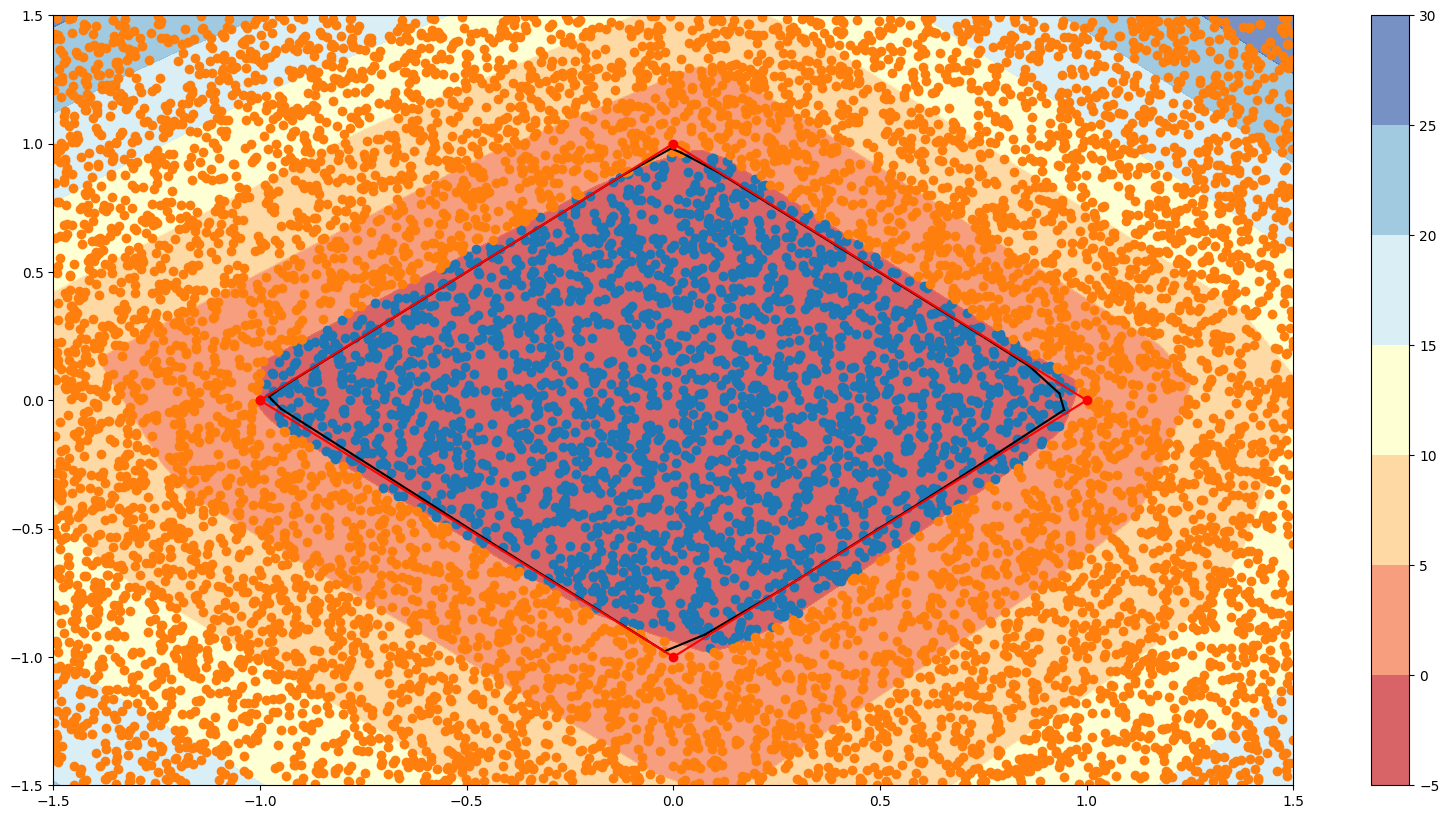

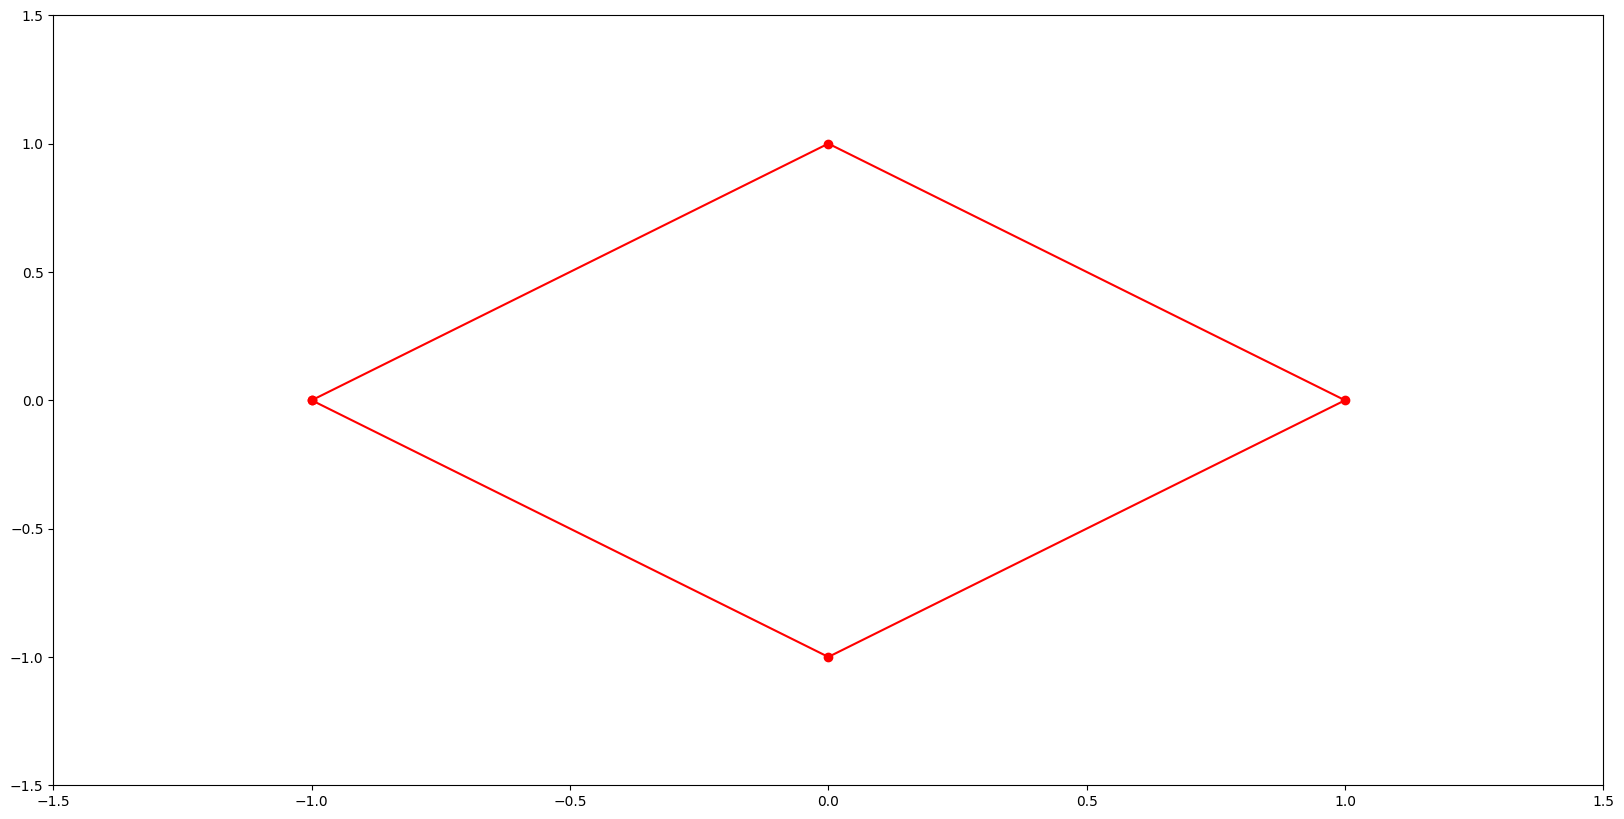

In [28]:
plots.plt_mesh()
plots.plt_adversarial_dotted()